<font color='blue'> Привет! Поздравляю с первым сборным проектом. Ниже мои комментарии выделены синим. </font>

Дополнил комментарий, выделен коричневым цветом.

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [54]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x:
                        '%.0f' % x if (x == x and x*10 % 10 == 0) 
                  else ('%.1f' % x if (x == x and x*100 % 10 == 0)
                  else '%.2f' % x))
df = pd.read_csv('/datasets/games.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Шаг 2

In [2]:
df.columns = df.columns.str.lower()
#df.query('user_score == "tbd"')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce', downcast='float')
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Изменил тип данных в столбце user_score, для дальнейшего анализа нужен числовой тип данных. Так же ввел код, для того, чтобы не отображался ноль на конце, но оставлял два знака после запятой. Пропуски заполнять не стал, так как это бы дало не верный анализ, здесь нет каких либо свопадений или закономерностей, поэтому решил оставить пропуски как есть. Значения tbd - это пропуски, я их убрал преобразовав столбец в тип float, для анализа они не понадобятся.


<font color='blue'> Хорошо, полезные действия. </font>

<font color='blue'> А с пропусками ничего делать не стал? Лучше все таки прокомментировать этот момент. </font>

Про пропуски прокоментировал.

<font color='red'> Ок. </font>

In [3]:
df['all_region_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1,nan,nan,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,0.01,0,nan,nan,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0,0.01,0,0,nan,nan,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,0.01,0,nan,nan,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0,0,0,nan,nan,NaN,0.01


<font color='blue'> Целевой параметр расчитан верно. </font>

### Шаг 3

Text(0.5, 1.0, 'Расределение кол-ва игр по годам')

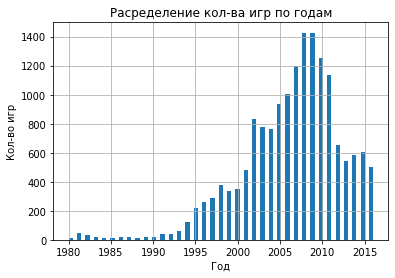

In [4]:
ax = df['year_of_release'].plot(kind='hist', bins=73, grid=True)
ax.set_xlabel('Год')
ax.set_ylabel('Кол-во игр')
ax.set_title('Расределение кол-ва игр по годам')

In [5]:
df_actual = df[df['year_of_release'] >= 2012]

Возьмем за актуальный период начиная с 2012 года, в среднем игра живет 3-5 лет, и как раз произошел резкий спад в 2012 году, почти в 2 раза кол-во игр уменьшилось, то есть производители нашли свою целевую аудиторию, технологии стали современнее, требования к играм стали выше и цены на игры так же возросли. Теперь определим топ платформы для анализа

<font color='blue'> Ок, здесь график все таки будет компактнее и нагляднее. </font>

<font color='red'> Ок. </font>

In [6]:
sales_platform = df_actual.pivot_table(index=['platform', 'year_of_release'],
                                       values='all_region_sales', aggfunc='sum')
#sales_platform.sort_values(by='all_region_sales', ascending=False)
#sales_platform.describe()
sales_platform_top = sales_platform[sales_platform['all_region_sales'] > 5] 
#sales_platform_top = sales_platform_top.sort_values(by='all_region_sales', ascending=False)
sales_platform_top





all_region_sales
platform year_of_release                  
3DS      2012                        51.36
         2013                        56.57
         2014                        43.76
         2015                        27.78
         2016                        15.14
DS       2012                        11.01
PC       2012                        23.22
         2013                        12.38
         2014                        13.28
         2015                         8.52
         2016                         5.25
PS3      2012                       107.36
         2013                       113.25
         2014                        47.76
         2015                        16.82
PS4      2013                        25.99
         2014                       100.00
         2015                       118.90
         2016                        69.25
PSP      2012                         7.69
PSV      2012                        16.19
         2013                        10.59
         2014                        11.90
         2015                         6.25
Wii      2012                        21.71
         2013                         8.59
WiiU     2012                        17.56
         2013                        21.65
         2014                        22.03
         2015                        16.35
X360     2012                        99.74
         2013                        88.58
         2014                        34.74
         2015                        11.96
XOne     2013                        18.96
         2014                        54.07
         2015                        60.14
         2016                        26.15

Как можно заметить, рынок игр терпит кризис, у каждой платформы заметен спад продаж на 4-5 год. Возьмем только те платформы, который производят игры в 2016 году(кроме PC, так как продажи на 2016 год слишком низкие), а так же две популярные платформы X360 и PS3, они производили игры до 2015 года, получается каждая платформа будет проанализированна за 4 года существования.

<font color='blue'> Хорошо, все верно, только опять немного не хватает графики для визуализации. </font>

Не смог подобрать правильный способ для визуализации данной таблицы, подскажи лучший способ, пожалуйста.

Text(-4.450000000000003, 0.5, 'Платформа')

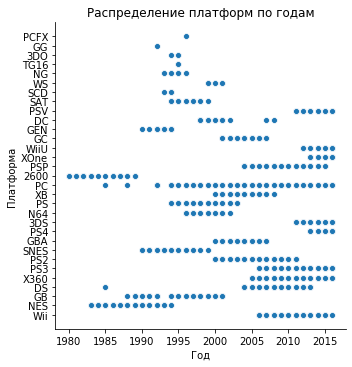

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.relplot(data = df
            ,y = 'platform'
            ,x = 'year_of_release'        
            )
plt.title('Распределение платформ по годам')
plt.xlabel('Год')
plt.ylabel('Платформа')

В основном платформы существует от 5 до 10 лет

<font color='blue'> Жизненный период выбран верно. </font>




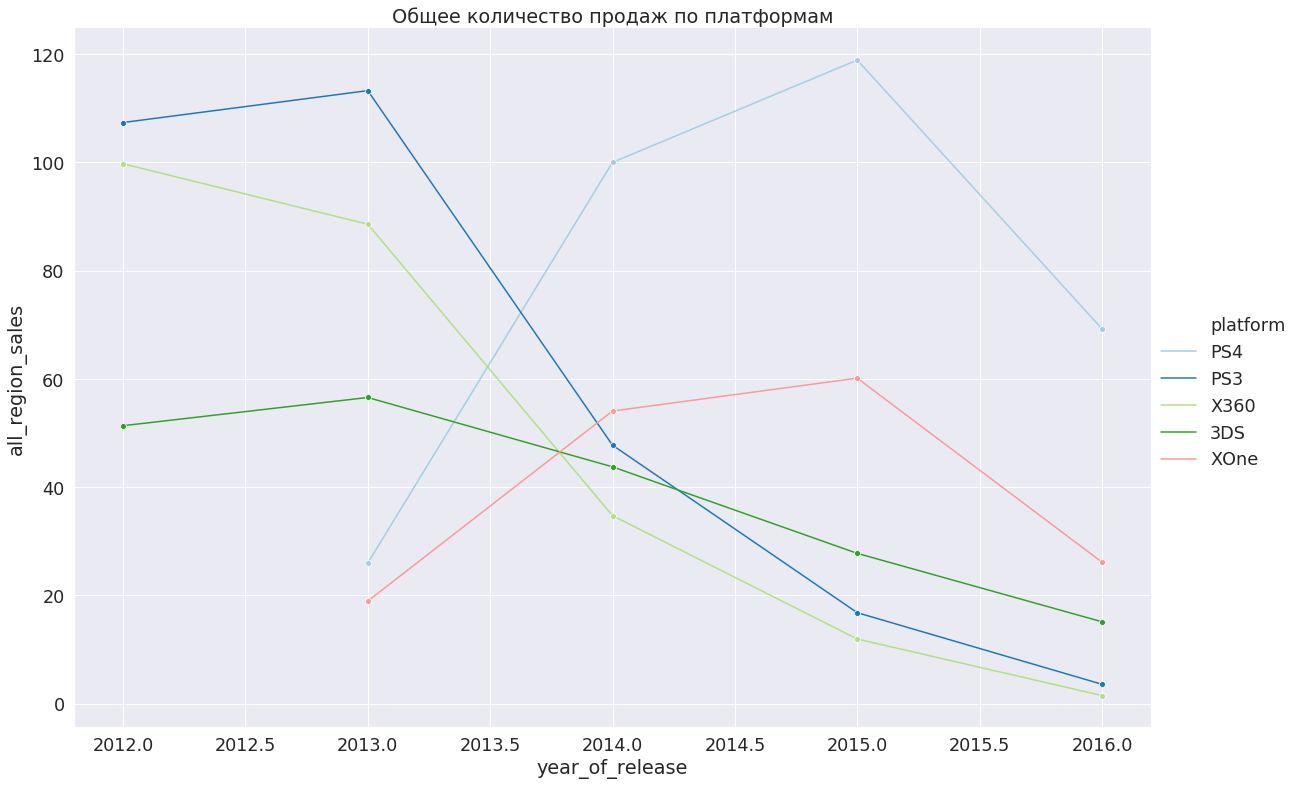

['PS4', 'PS3', 'X360', '3DS', 'XOne']

In [8]:
def print_line_plot_by_year(year, top):
    """ Построение линейного графика, с фильтром по топ-значениям """
    games_df_filtered = df.query('year_of_release >= @year')
    games_df_top_sale = pd.pivot_table(games_df_filtered, index=['year_of_release', 'platform'], values='all_region_sales', aggfunc='sum', fill_value=0)
    games_df_top_sale.reset_index(inplace=True)
    
    top_platform = games_df_top_sale.groupby(['platform']).agg(sales=('all_region_sales', 'sum')).sort_values(by='sales', ascending=False).head(top).index.tolist()
    
    games_df_top_sale = games_df_top_sale.query('platform in @top_platform')
    #games_df_top_sale['platform'].cat.remove_unused_categories()
    
    sns.set(font_scale=1.6)
    sns.relplot(
        x='year_of_release', 
        y='all_region_sales', 
        hue='platform', 
        kind="line", 
        marker='o', 
        hue_order=top_platform, 
        palette='Paired', 
        data=games_df_top_sale, 
        height=11, 
        aspect=1.5
        
    )
    plt.title('Общее количество продаж по платформам')
    plt.show()

    return top_platform

print_line_plot_by_year(2012, 5)

Мы получили пятерку лидеров продаж именно с 2012 года и построили динамики. Если отбросить неполный 2016 год, то растут PS4 и XOne.

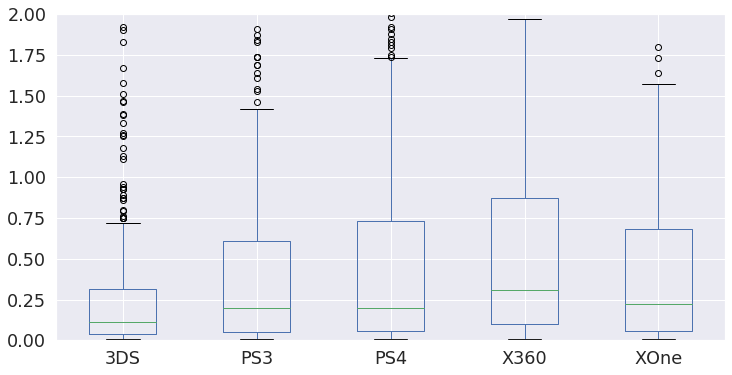

In [9]:
column_list1 = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
fig,ax = plt.subplots(figsize=(12,6))
df_actual.query('platform == @column_list1').pivot_table(values='all_region_sales', index=['name'],
                                                 columns='platform').boxplot(
                                                ax=ax, grid=True)
ax.set_ylim(0,2)
plt.show()

<font color='blue'> Технически ящики с усами построены хорошо </font>

In [10]:
df_actual_final = df_actual.query('platform == @column_list1')
df_actual_final.pivot_table(values='all_region_sales', index=['name'],
                                                  columns='platform').describe()


platform,3DS,PS3,PS4,X360,XOne
count,396,492,392,292,247
mean,0.49,0.58,0.80,0.81,0.65
std,1.39,1.46,1.61,1.71,1.04
min,0.01,0.01,0.01,0.01,0.01
25%,0.04,0.05,0.06,0.1,0.06
50%,0.11,0.2,0.2,0.31,0.22
75%,0.31,0.61,0.73,0.87,0.69
max,14.6,21.05,14.63,16.27,7.39


Больше всего игр для приставки PS3, после идет PS4, средняя сумма продаж выше у X360, на втором месте PS4. Примем за топ платформу PS4

Text(0.5, 1.0, 'Влияние отзывов критиков на продажи')

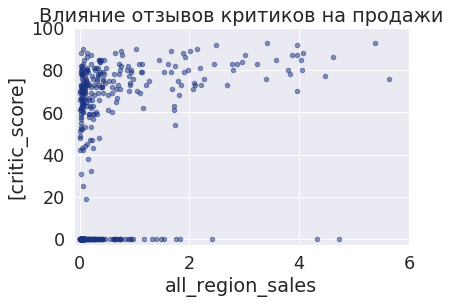

In [90]:
ax = df_actual_final.query('platform == "PS4"').pivot_table(index=['name'], values=['critic_score',
                                                                   'user_score',
                                                                   'all_region_sales'],
                                           aggfunc='sum').plot(x='all_region_sales',
                                                               y=['critic_score'],
                                                 kind='scatter',alpha=0.5, c= np.atleast_2d(np.array([0.1, 0.2, 0.5])))
ax.set_xlim(-0.1,6)
ax.set_ylim(-3,100)
ax.set_title('Влияние отзывов критиков на продажи')

Text(0.5, 1.0, 'Влияние отзывов пользователей на продажи')

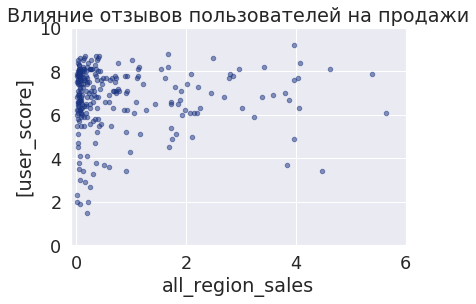

In [92]:
ax = df_actual_final.query('platform == "PS4"').pivot_table(index=['name'], values=['critic_score',
                                                                   'user_score',
                                                                   'all_region_sales']
                                           ).plot(x='all_region_sales',
                                                              y=['user_score'],
                                                 kind='scatter',alpha=0.5,
                                                  c= np.atleast_2d(np.array([0.1, 0.2, 0.5])))
                                                 
ax.set_xlim(-0.1,6)
ax.set_ylim(0,10)
ax.set_title('Влияние отзывов пользователей на продажи')

In [13]:
df_actual_final.query('platform == "PS4"').pivot_table(index=['name'], values=['critic_score',
                                                                   'user_score',
                                                                   'all_region_sales'],
                                           ).corr().loc[:, 'all_region_sales']


all_region_sales       1
critic_score        0.41
user_score         -0.03
Name: all_region_sales, dtype: float64

Как видно по графикам распределения и по таблице корреляции, пользовательский отзывы совсем не влияют на продажу,  а вот отзывы критиков значительно влияют на продажи.

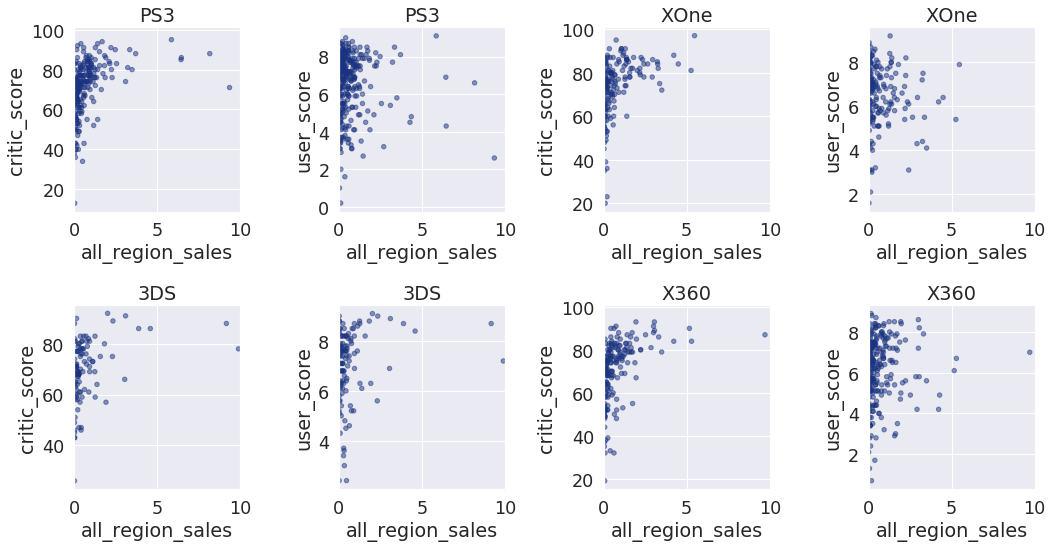

In [83]:
column_list2 = ['PS3', 'XOne', '3DS', 'X360']
fig = plt.figure(figsize = (15,8))
fig.subplots_adjust(wspace=0.5, hspace = 0.5)
с=0

for i in column_list2:
    df_2 = df_actual_final.query('platform == @i')
    с+=1
    sub = fig.add_subplot(2,4,с)
    st = df_2.plot(x='all_region_sales', y='critic_score', kind='scatter', alpha=0.5,
                   ax=sub, c= np.repeat(np.atleast_2d(np.array([0.1, 0.2, 0.5])), len(df_2), axis = 0))
    с+=1
    sub = fig.add_subplot(2,4,с)
    ax = df_2.plot(x='all_region_sales', y='user_score', kind='scatter', alpha=0.5,
                   ax=sub, c= np.repeat(np.atleast_2d(np.array([0.1, 0.2, 0.5])), len(df_2), axis = 0))
    st.set_xlim(0,10)
    st.set_title(i)
    ax.set_xlim(0,10)
    ax.set_title(i)
    
plt.show()

In [29]:
for i in column_list2:
    df_2 = df_actual.query('platform == @i')
    st = df_2.pivot_table(index=['name'], values=['critic_score', 'user_score',
                                                   'all_region_sales'], columns='platform').corr()
    st = st.loc[:, 'all_region_sales']
    print(st)

platform                    PS3
                 platform      
all_region_sales PS3          1
critic_score     PS3       0.33
user_score       PS3      -0.00
platform                   XOne
                 platform      
all_region_sales XOne         1
critic_score     XOne      0.42
user_score       XOne     -0.07
platform                   3DS
                 platform     
all_region_sales 3DS         1
critic_score     3DS      0.32
user_score       3DS      0.20
platform                   X360
                 platform      
all_region_sales X360         1
critic_score     X360      0.36
user_score       X360      0.01


Вывод: по остальным топ платформам, сохраняется тенденция большего влияния отзывов критиков, нежели пользовательских. Лишь только платформа 3DS имеет влияние пользовательских отзывов на продажи


<font color='red'> Ок. </font>

In [ ]:
genre_stat = df_actual_final.pivot_table(index='genre', values=['all_region_sales'],
                            aggfunc=['count', 'sum','mean'])
genre_stat.columns = ['Кол-во игр', 'Общая прибыль по жанрам', 'Средняя прибыль по жанрам']
genre_stat.sort_values(by='Общая прибыль по жанрам', ascending=False)

По данным таблицы видно, что фаворит жанров Action имеет большее кол-во игр и большую общую прибыль, на втором месте жанр Shooter и средняя прибыль выше у игры жанра Shooter, на втором месте жанр Sports.

<font color='blue'> Жанры выделены верно. Возможно таке подкорректировать период рассмотрения, но думая, результат сильно не изменнться. Можно сравнить для интереса.. </font>

### Шаг 4

In [ ]:
na_region_platform_stat = df_actual_final.pivot_table(index='platform',
                                                                     values=['na_sales'],
                            aggfunc=['count','sum'])
na_region_platform_stat.columns = ['Кол-во игры для платформы', 'Общаяя сумма продаж' ]
na_region_platform_stat = na_region_platform_stat.sort_values(by='Кол-во игры для платформы',
                                                        ascending=False)
na_region_platform_stat['Доля продаж'] = (na_region_platform_stat['Общаяя сумма продаж']/(na_region_platform_stat['Общаяя сумма продаж'].sum())) * 100


eu_region_platform_stat = df_actual_final.pivot_table(index='platform',
                                                                     values=['eu_sales'],
                            aggfunc=['count','sum'])
eu_region_platform_stat.columns = ['Кол-во игры для платформы', 'Общаяя сумма продаж' ]
eu_region_platform_stat = eu_region_platform_stat.sort_values(by='Кол-во игры для платформы',
                                                        ascending=False)
eu_region_platform_stat['Доля продаж'] = (eu_region_platform_stat['Общаяя сумма продаж']/(eu_region_platform_stat['Общаяя сумма продаж'].sum())) * 100

jp_region_platform_stat = df_actual_final.pivot_table(index='platform',
                                                                     values=['jp_sales'],
                            aggfunc=['count','sum'])
jp_region_platform_stat.columns = ['Кол-во игры для платформы', 'Общаяя сумма продаж' ]
jp_region_platform_stat = jp_region_platform_stat.sort_values(by='Кол-во игры для платформы',
                                                        ascending=False)
jp_region_platform_stat['Доля продаж'] = (jp_region_platform_stat['Общаяя сумма продаж']/(jp_region_platform_stat['Общаяя сумма продаж'].sum())) * 100


In [ ]:
all_region_sales_stat = na_region_platform_stat.merge(eu_region_platform_stat, on='platform')
all_region_sales_stat_1 = all_region_sales_stat.merge(jp_region_platform_stat,
                                                          on='platform')
all_region_sales_stat_final = all_region_sales_stat_1.pivot_table(index='platform',
                                                                  values=['Кол-во игры для платформы_x',
                                                                          'Общаяя сумма продаж_x',
                                                                          'Общаяя сумма продаж_y',
                                                                          'Общаяя сумма продаж',
                                                                          'Доля продаж_x',
                                                                          'Доля продаж_y',
                                                                          'Доля продаж'])
all_region_sales_stat_final = all_region_sales_stat_final[['Кол-во игры для платформы_x',
                                                                          'Общаяя сумма продаж_x',
                                                                          'Общаяя сумма продаж_y',
                                                                          'Общаяя сумма продаж',
                                                                          'Доля продаж_x',
                                                                          'Доля продаж_y',
                                                                          'Доля продаж']]
all_region_sales_stat_final.columns = ['Кол-во игр для платформ', 'Общаяя сумма продаж_na',
                                      'Общаяя сумма продаж_eu', 'Общаяя сумма продаж_jp',
                                      'Доля продаж_na','Доля продаж_eu','Доля продаж_jp']
all_region_sales_stat_final = all_region_sales_stat_final.sort_values(by='Кол-во игр для платформ',
                                                                     ascending=False)
all_region_sales_stat_final

На первом месте по общий сумме продаж занимает платформа X360 и доля продаж соотвественно выше. То есть чем выше общая сумма подаж, соотвественно и больше доля продаж. Анализ проведен по всем платформам и выведенны топ-5 платформ по регоинам список одинаковый. Видно, что в продажи в Японии совсем маленькие, на втором месте идут продажи в европе и на первом месте продажи в Северной Америке. Так же хотелось бы отметить тот факт что самая популярная платформа в Японии это 3DS, как раз только это платформа имеет влияние пользовательского рейтинга на продажи - это говорит о том, что рынок в Японии кардинально отличается от рынков Европы и Северной Америки. Так же это прослеживается по PS4 и X360(самые популярные плафтормы в Европе и Северной америке соответственно) имееют минимальные продажи в Японии, не учитывая платформу XOne.

In [ ]:
na_region_genre_stat = df_actual_final.pivot_table(index='genre',
                                                                     values=['na_sales'],
                            aggfunc=['sum'])
na_region_genre_stat.columns = ['Кол-во игры по жанру, na']
na_region_genre_stat = na_region_genre_stat.sort_values(by='Кол-во игры по жанру, na',
                                                        ascending=False)


eu_region_genre_stat = df_actual_final.pivot_table(index='genre',
                                                                     values=['eu_sales'],
                            aggfunc='sum')
eu_region_genre_stat.columns = ['Кол-во игры по жанру, eu']
eu_region_genre_stat = eu_region_genre_stat.sort_values(by='Кол-во игры по жанру, eu',
                                                        ascending=False)


jp_region_genre_stat = df_actual_final.pivot_table(index=
                                                                            'genre',
                                                                     values=['jp_sales'],
                            aggfunc=['sum'])
jp_region_genre_stat.columns = ['Кол-во игры по жанру, jp']
jp_region_genre_stat = jp_region_genre_stat.sort_values(by='Кол-во игры по жанру, jp',
                                                        ascending=False)
na_region_genre_stat = na_region_genre_stat.head(5)
eu_region_genre_stat = eu_region_genre_stat.head(5)
jp_region_genre_stat = jp_region_genre_stat.head(5)
print(na_region_genre_stat, end='')
print('')
print(eu_region_genre_stat, end='')
print('')
print(jp_region_genre_stat)

В Северной Америке и Европе любимым жанром игр считается Action, в японии же Role-Playing.
Впринципе список одинаков, только в Японии отличается два жанра, это Simulation и Fighting, возможно если бы было больше игр этих жанров, в Японии бы продажи возросли.

In [ ]:
rating_sales_stat = df_actual_final.pivot_table(index='rating', 
                                                                  values=['na_sales',
                                                                          'eu_sales',
                                                                         'jp_sales'], aggfunc='sum')
rating_sales_stat = rating_sales_stat[['na_sales', 'eu_sales', 'jp_sales']]
rating_sales_stat      

Как видно в таблице, самый популярный рейтинг игр это M,  все рейтинги по убыванию располагаются в соотвествии с общими продажами по региону.
#### Вывод: рейтинги влияют на продажи в отдельном регионе

<font color='blue'> Ок, портрет пользователя получен верно. </font>

### Шаг 5

In [ ]:
revenue_xone = df[df['year_of_release'] >= 1995].loc[df['platform'] == "XOne"].pivot_table(index='name', values='user_score',
                                                           aggfunc='mean')
revenue_pc = df[df['year_of_release'] >= 1995].loc[df['platform'] == "PC"].pivot_table(index='name', values='user_score',
                                                           aggfunc='mean')
platform_list = ['XOne', 'PC']
variance_platfrom = df[df['year_of_release'] >= 1995].query('platform == @platform_list').pivot_table(index='platform', values='user_score', aggfunc='var')

variance_platfrom



Диссперсии нельзя считать равными поэтому укажем аргумент "equal_var = False"

In [ ]:
from scipy import stats as st
alpha = .05
results = st.ttest_ind(revenue_xone, revenue_pc, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Так как мы проверяем гипотезу, о том, что две генеральные совокупности одинаковые, я поставил в условии results.pvalue > alpha, знак больше. Исходя из значения р значимость различияи средних двух датасетов значительна. И поэтому гипотеза неверна, совокупности разные.
Соотвественно, если бы у нас стоял вопрос гипотезы, о различии двух ген.совокупностей, то в условии стоял знак меньше и мы бы отвергли нулевую гипотезу. В моем случае, альтернативная гипотеза говорит о том, что мы соглашаемся с гипотезей, а принятие нулевой гипотезы, говорит, что совокупности одинаковы.

In [ ]:
revenue_action = df[df['year_of_release'] >= 1995].loc[df['genre'] == "Action"].pivot_table(index='name', values='user_score',
                                                           aggfunc='mean')
revenue_sports = df[df['year_of_release'] >= 1995].loc[df['genre'] == "Sports"].pivot_table(index='name', values='user_score',
                                                           aggfunc='mean')
genre_list = ['Action', 'Sports']
variance_genre = df[df['year_of_release'] >= 1995].query('genre == @genre_list').pivot_table(index='genre', values='user_score', aggfunc='var')
variance_genre


Диссперсии нельзя считать равными поэтому укажем аргумент "equal_var = False"

In [ ]:
variance_platfrom
alpha = .05
results = st.ttest_ind(revenue_action, revenue_sports, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

В данном случае вопрос гипотезы о различии двух совокупностей, поэтому нулевая гипотеза говорит о случайном совпадении,  а альтернативная о том, что совокупности одинаковы. Полученное значение p-value говорит о том, что хотя cредние пользовательские рейтинги жанров Action и Sports разные, с вероятностью в почти 20% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.

<font color='blue'> Гипотезы сформулированы и проверены верно. </font>

### Вывод:  По продажам абсолютно все платформы имеют спад на 4-й, 5-й год - это связанно с тем, что целевая аудитория закупает вышедшую модель, впервый год, но не привлекается новая аудитория. Так же на момент выхода PS4 в 2013 году, предшественник PS3 имел рост прибыли в 2013 году, поэтому на момент реализации PS4 не имела успеха и продажи были малы, относительно 2014 года. Поэтому разработчкам нужно прослеживать эту тенденцию и выпускать модель только в момент спада продаж предидущей модели. Рынки продуктов абсолютно разные, больше всего отличий у рынка Японии, целевая аудитория там только на платформу 3DS, хотя в остальных регионах она не имела успеха, так же фаворит в Европе - PS4, а в Северной Америке - X360, эти платформы имееют меньшие продажи в Японии. Так же, только в Японии имеют влияние на продажу игр пользовательские отзывы, но по всем остальным платформам большее влияние имеет рейтинг критиков. Что касается жанров, в Северной Америке и Европе одинаковые предпочетния, разница в 5-ом месте Misc и Racing, соответственно. В Японии же абсолютно другие предпочтения и игр достаточно мало у этих жанров, возможно эти игры производятся только на платформе 3DS, поэтому остальные плафтормы не имели успеха в этом регионе. Нужно учитывать разницу предпочтений по регионам, и каждой платформе оринтироваться на свою целевую аудиторию, для максимального успеха. Прогноз на 2017 год, стабильная тенденция спада продаж игр по всем платформам сохранится, поэтому 2017 самое время для релиза новых/обновленных платформ, под свою целевую аудиторию,  если появится абсолютно новая платформа, здесь нужно учитываться какие жанры игр в оснвоном будут производиться для платформы и какой будет интерфейс, в зависимости от этого будет ясна картина: в каком регионе эта плафторма будет иметь успех. 



<font color='blue'> Технически проект выполнен хорошо. Постарайся немного глубже проникнуть в логику проекта и доработать его по замечаниям. Удачи. </font>

<font color='red'> Попробуй сам дойти до актуальных платформ. Осталось пару шагов.... </font>